<a href="https://colab.research.google.com/github/nherger/umuzi/blob/master/Umuzi_salary_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise link: https://github.com/Umuzi-org/salary/blob/master/assignment1.md

Please write to us in the *umuzi_coders* slack channel if anything is unclear.

Import required modules.

In [0]:
import matplotlib.pyplot as plt
import math
import seaborn as sns
import pandas as pd
from scipy.stats import stats 

# Assignment 1

Import the data *salary.csv* and store as a pandas dataframe.

In [0]:
df_salary = pd.read_csv('https://raw.githubusercontent.com/Umuzi-org/salary/master/salary.csv')
df_salary.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


##**1. How many responders are there? Are there any missing values in any of the variables?**

In [0]:
print('There are ' + str(len(df_salary)) + ' responders (number of rows).')

There are 514 responders (number of rows).


In [0]:
df_salary.isnull().sum()
# There is one missing value in the salary column.

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

Drop the row which contains the missing value (in this case just 1).

In [0]:
df_salary = df_salary.dropna()

##**2. What is the lowest salary and highest salary in the group?**

In [0]:
print('Lowest salary: $' + str(df_salary.salary.min()))
print('Highest salary: $' + str(df_salary.salary.max()))

Lowest salary: $29000.0
Highest salary: $96156.0


##**3. What is the mean salary for the sample? Include the standard error of the mean.**

In [0]:
print('Mean salary: $' + str(round(df_salary.salary.mean(), 2)))
print('Standard error of the mean: $' + str(round(df_salary.salary.sem(),2)))

Mean salary: $50863.22
Standard error of the mean: $560.06


##**4. What is the standard deviation for the years worked?**

In [0]:
print('Standard deviation of years worked: ' + str(round(df_salary.yearsworked.std(), 2)) + ' years')

Standard deviation of years worked: 9.45 years


##**5. What is the median salary for the sample?**

In [0]:
print('Median salary: $' + str(df_salary.salary.median()))

Median salary: $50096.0


##**6. What is the interquartile range for salary in the sample?**

In [0]:
Q1 = df_salary.salary.quantile(0.25)
Q3 = df_salary.salary.quantile(0.75)
print('IQR for salary: $' + str(Q3 - Q1))

# Alternative: stats.iqr(df_salary.salary)

IQR for salary: $20345.0


The [interquartile range (IQR)](https://en.wikipedia.org/wiki/Interquartile_range) is the differerence between the 75th (Q3) and 25th (Q1) percentile of the distribution.

##**7. How many men are there in the sample? How many women are there in the sample? Present this information in a table.**


In [0]:
pd.DataFrame(data = {'men': [df_salary.male.sum()], 'women': [sum(df_salary.male==0)]})
# Alternative: df_salary.male.value_counts()

,men,women
0,385,128


##**8. How many women are executives compared to men?**

In [0]:
women_exec = len(df_salary[(df_salary.male==0) & (df_salary.position==3)])
men_exec = len(df_salary[(df_salary.male==1) & (df_salary.position==3)])
print('Female executives: ' + str(women_exec))
print('Male executives: ' + str(men_exec))

Female executives: 19
Male executives: 191


##**9. Create a histogram for the variable Salary.**

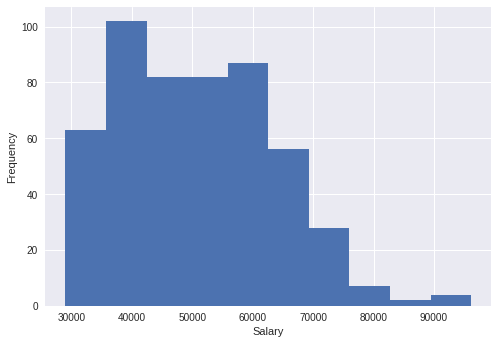

In [0]:
df_salary.salary.plot(kind = 'hist')
plt.xlabel('Salary')
plt.show()

##**10. Examine the histogram and describe the distribution for Salary.**

The salary ranges from around 30000 dollars to over 90000 dollars, with the bulk around 50000 dollars. The distribution is right-skewed, meaning the distribution is not symmetric around the mean and the tail of the distribution is longer on the right hand side than on the left hand side.

##**11. Create a bar graph to show the different average salaries of men and women. (Bonus: Add error bars to the bars showing the 95% confidence interval). What does the graph tell you about the difference between men and women’s salaries?**

In [0]:
stats_df = df_salary.groupby('male').salary.agg(['mean', 'count', 'std'])
stats_df['conf_95'] = stats_df.apply(lambda row: 1.96*row['std']/math.sqrt(row['count']), axis=1)
stats_df

,mean,count,std,conf_95
male,,,,
0,42916.604797,128,9161.609591,1587.167886
1,53505.211678,385,12599.304199,1258.555200


The equation for the confidence interval can be found here: https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data

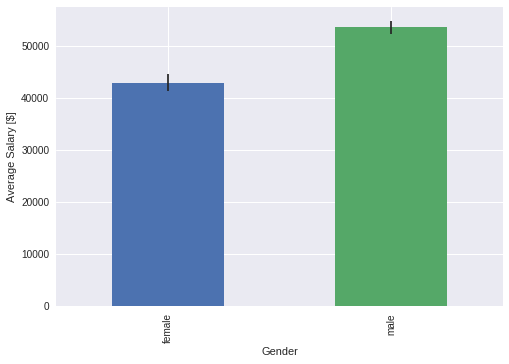

In [0]:
ax = stats_df['mean'].plot(kind = 'bar', yerr=stats_df['conf_95'])
ax.set_xticklabels(['female', 'male'])
plt.ylabel('Average Salary [$]')
plt.xlabel('Gender')
plt.show()

The average salary of men (in green) is higher than the one of women (in blue). Note that the 95% confidence intervals of the two distributions do not overlap, suggesting that the difference in salaries between the men and women is significant.

##**12. Create a scatterplot with seaborn showing the relationship between Years Worked and Salary (don’t forget to insert a trend line).**

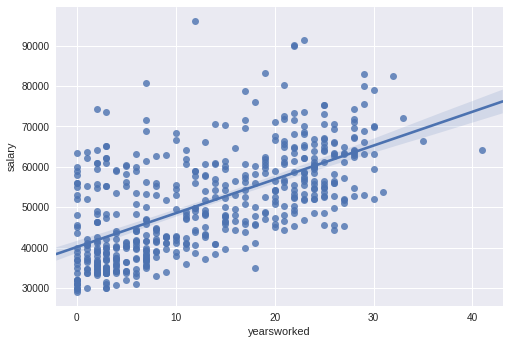

In [0]:
sns.regplot(df_salary.yearsworked, df_salary.salary)

**What is the relationship between Years Worked and Salary? Describe any patterns in the scatterplot.**


There is a positive relationship between years worked and salary. I.e as the number of years worked increases, the salary generally increases.

Note that the years worked are discretised, leading to the markers being aligned vertically at intervals of one year.

**Do you notice any unusual/extreme values that do not fit the general trend? If you see any unusual values, briefly describe them (Who are they? In what way are they different?)**

There are some outliers where people get more pay for less years worked.

In [0]:
df_salary[df_salary.salary == df_salary.salary.max()]

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
377,96156.0,20,12,12,1.19,1,0,3,1,1,2


The example above contains infomation about the person with the highest salary, and is very far away from the trend line. He has only 12 years of work experience, but a very high salary compared to his peers. This indicates that there might be other factors relevant to predict someone's salary (like degree or exprior).

##**13. Using the pearsonr function from the scipy.stats package, calculate the Pearson correlation coefficient (and its corresponding p value) to determine the nature of the relationship between Years Worked and Salary. See help(pearsonr) for help on this function.**

In [0]:
r, p = stats.pearsonr(df_salary.yearsworked, df_salary.salary)
print('The correlation coefficient is ' + str(round(r, 2)))
print('The p-value is ' + str(round(p, 2)))

The correlation coefficient is 0.62
The p-value is 0.0


**Interpret the size and direction of the correlation statistic.**

There is a moderately strong and positive relationship (corr. coef > 0) between years worked and salary. I.e. as the plot shows above, as the years worked increases, the salary tends to increase too.

**Is the relationship statistically significant? Report the appropriate statistic(s) to support your answer.**

Yes, the relationship is statistically significant because p < 0.05. You can read up more about p-values and what they tell us about statistical significance here: https://www.statsdirect.com/help/basics/p_values.htm. Note that the p-value is 1.29 * 10^-56, therefore a very small number.